This is an example for the extension `displaytools` from the package [ipydex](https://github.com/cknoll/ipydex) for the IPython Notebook.

The extension introduces some "magic" comments (like `##` and `##:` ) which trigger additional output (normally only the return value of the last line of a cell is printed). See [Why is this useful?](#why-usefull)

Note that this extension is not yet in mature state and has known issues (e.g., coping with named arguments).

This example was tested successfully under python3.5 and python2.7

In [1]:
%load_ext ipydex.displaytools

import ipydex
ipydex.__version__

'0.6.0'

In [2]:
import sympy as sp
from sympy import sin, cos
from sympy.abc import t, pi
from sympy.interactive import printing
printing.init_printing()

---


---


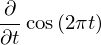

---


In [3]:
x = 2*pi*t
y1 = cos(x)
y2 = cos(x)*t
ydot1 = y1.diff(t) ##
ydot2 = y2.diff(t) ##
ydot1_obj = y1.diff(t, evaluate=False) ##

Note that the equation sign (i.e., `=`) must be enclosed by spaces, i.e.: `lhs = rhs`.

---
If the variable name is also desired this can be triggered by `##:`

---


---


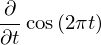

---


In [4]:
ydot1 = y1.diff(t) ##:
ydot2 = y2.diff(t) ##:
ydot1_obj = y1.diff(t, evaluate=False) ##:

---
Printing can be combined with LaTeX rendering:

In [5]:
sp.interactive.printing.init_printing(1)

---


---


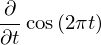

---


In [6]:
ydot1 = y1.diff(t) ##:
ydot2 = y2.diff(t) ##:
ydot1_obj = y1.diff(t, evaluate=False) ##:

---

If there is no assignment taking place, `##` nevertheless causes the display of the respective result.

In [7]:
y1.diff(t,t) ##
y2.diff(t,t) ##

___


___


### Transposition

Sometimes, it can save much space if some return value is displayed in transposed form (while still being assigned not transposed). Compare these examples:

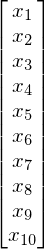

---


---


___


In [8]:
xx = sp.Matrix(sp.symbols('x1:11')) ##
yy = sp.Matrix(sp.symbols('y1:11')) ##:T

xx.shape, yy.shape ##

In [9]:
# combination with other comments
a = 3 # comment ##:

---


In [10]:
# Multiline statements and indended lines are not yet supported:
a = [1, 
     2] ##:

if 1:
    b = [10, 20] ##:


c = [100, 200] ##:

---


In [11]:
# numpy arrays and matrices (indented to take left-hand-side into account)

import numpy as np

np.random.seed(0)

A = np.random.random((5, 4)) ##:
np.matrix(A) ##:

# heuristic to insert a newline if indentation would be too long
A_with_long_name = A ##:



A := array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
            [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
            [0.96366276, 0.38344152, 0.79172504, 0.52889492],
            [0.56804456, 0.92559664, 0.07103606, 0.0871293 ],
            [0.0202184 , 0.83261985, 0.77815675, 0.87001215]])

---


np.matrix(A)  := matrix([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
                         [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
                         [0.96366276, 0.38344152, 0.79172504, 0.52889492],
                         [0.56804456, 0.92559664, 0.07103606, 0.0871293 ],
                         [0.0202184 , 0.83261985, 0.77815675, 0.87001215]])

___


A_with_long_name := 
array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
       [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
       [0.96366276, 0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985, 0.77815675, 0.87001215]])

---


In [12]:
# that new-line feature is aware of the configured linewidth

np.set_printoptions(linewidth=110)

B = np.random.random((5, 7)) ##:
B_with_long_name = B ##:


B := array([[0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443, 0.63992102, 0.14335329],
            [0.94466892, 0.52184832, 0.41466194, 0.26455561, 0.77423369, 0.45615033, 0.56843395],
            [0.0187898 , 0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 , 0.3595079 ],
            [0.43703195, 0.6976312 , 0.06022547, 0.66676672, 0.67063787, 0.21038256, 0.1289263 ],
            [0.31542835, 0.36371077, 0.57019677, 0.43860151, 0.98837384, 0.10204481, 0.20887676]])

---


B_with_long_name := 
array([[0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443, 0.63992102, 0.14335329],
       [0.94466892, 0.52184832, 0.41466194, 0.26455561, 0.77423369, 0.45615033, 0.56843395],
       [0.0187898 , 0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 , 0.3595079 ],
       [0.43703195, 0.6976312 , 0.06022547, 0.66676672, 0.67063787, 0.21038256, 0.1289263 ],
       [0.31542835, 0.36371077, 0.57019677, 0.43860151, 0.98837384, 0.10204481, 0.20887676]])

---


### Why this extension might be useful?
<a id='why-usefull'></a>

 * It saves space in the final document, when intermediate results shall be displayed (e.g. for didactic purpose)
   * allows to focus more on the content/results instead of boilerplate printing code
 * It saves typing effort during the development process (when internal information is of interest to understand and debug the code)
   

In [13]:
from ipydex import save_current_nb_as_html
save_current_nb_as_html()